# DAT405 Assignment 3 - Group 2

### Francisco Boudagh - (15 hours)
### Jakob Engström - (15 hours)

### April 19, 2023


------------------

# Problem 1
## 1. a)

In [87]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

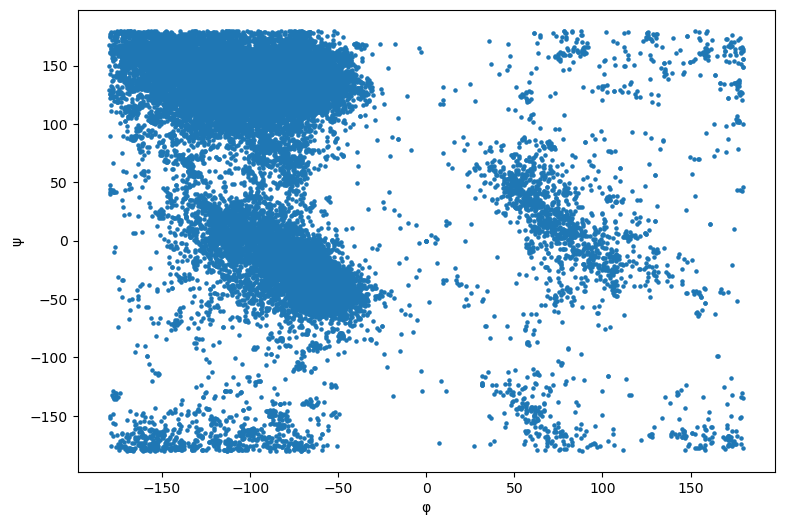

In [88]:
df = pd.read_csv('data_assignment3.csv')

plt.figure(figsize=(9,6))

phi_x = np.array(df['phi'])
plt.xlabel('\u03C6')
psi_y = np.array(df['psi'])
plt.ylabel('\u03C8')

plt.scatter(phi_x, psi_y, 5)
plt.show()

## 1. b)

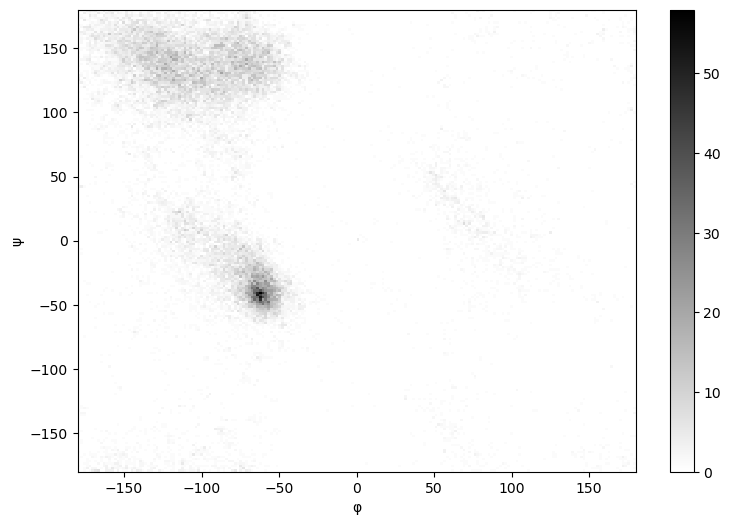

In [89]:
plt.figure(figsize=(9,6))
plt.hist2d(phi_x, psi_y, bins=200, cmap='binary')
plt.xlabel('\u03C6')
plt.ylabel('\u03C8')
cb = plt.colorbar()
plt.show()

## 1. c)

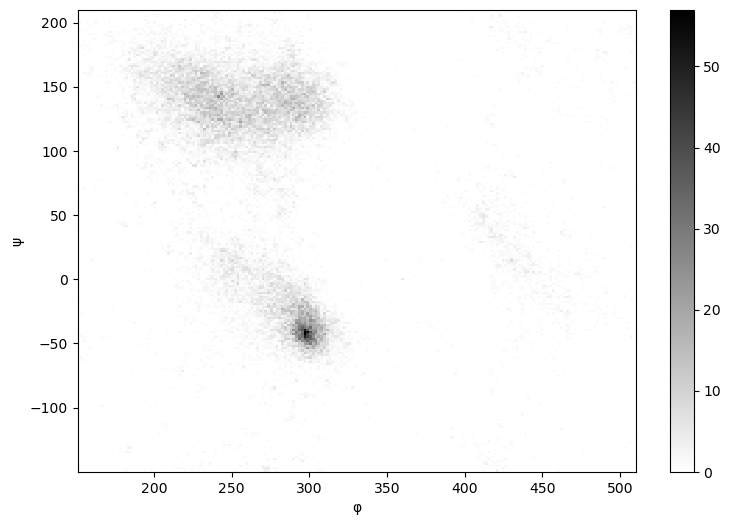

In [90]:
plt.figure(figsize=(9,6))

for i in range(len(psi_y)):
    if psi_y[i] < -150:
        psi_y[i] = psi_y[i] + 360

for i in range(len(phi_x)):
    if phi_x[i] < 150:
        phi_x[i] = phi_x[i] + 360        

plt.hist2d(phi_x, psi_y, bins=200, cmap='binary')
plt.xlabel('\u03C6')
plt.ylabel('\u03C8')
cb = plt.colorbar()
plt.show()

# Problem 2
## 2. a)

In [91]:
from sklearn.cluster import KMeans

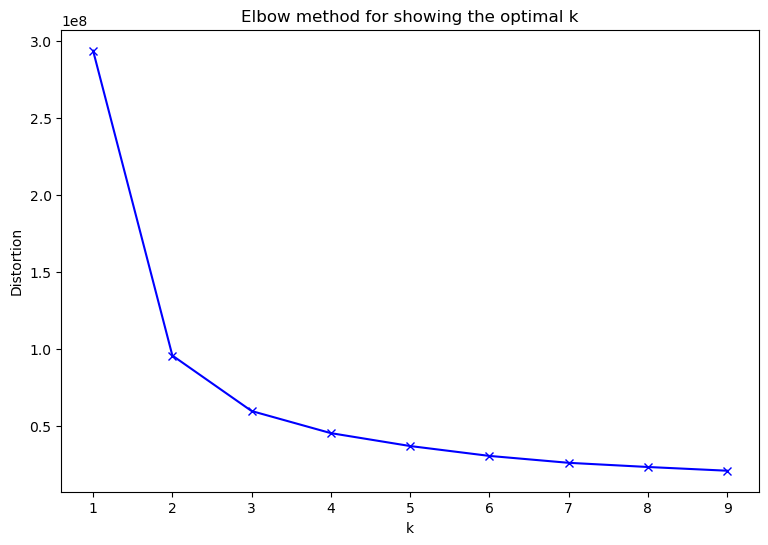

In [92]:
# Creating list with phi and psi values (nx2)
X = list(zip(phi_x, psi_y))

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(9,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow method for showing the optimal k')
plt.show()

We are using the Elbow Method to find the optimal k value. The optimal k value is 3, as it can be seen in the figure above.

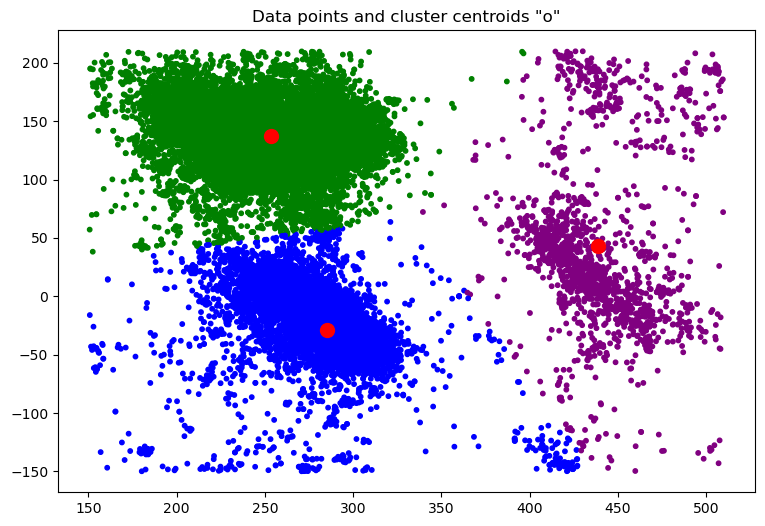

In [93]:
plt.figure(figsize=(9,6))

# Creating list with phi and psi values (nx2)
X = list(zip(phi_x, psi_y))

# Optimal k value = 3, this can be seen in the figure above :D
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

colors = ['blue' if label == 0 else 'green' if label == 1 else 'purple' for label in kmeans.labels_]

plt.scatter(phi_x, psi_y, 10, c=colors)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],100, c='red', marker='o')
plt.title('Data points and cluster centroids "o"')
plt.show()

## 2. b)

The clusters in 2.a) seems to be reasonable in general. But the cluster to the right seems to be effected by the smaller data clusters above and below the centroid, hence pushing the centroid above the concentrated cluster. When chosing a higher k value, such as 8, the smaller data sets gets their own centorids.

# Problem 3
## 3. a) and b)

In [94]:
X_ny = np.column_stack((phi_x, psi_y))
print(X_ny)

[[210.687145 142.657714]
 [315.71679  136.002076]
 [240.027379 191.294737]
 ...
 [246.413552 112.09197 ]
 [259.331221 -12.102821]
 [190.04876   94.23368 ]]


In [95]:
from sklearn.cluster import DBSCAN
# Compute DBSCAN
db = DBSCAN(eps=11,min_samples=75).fit(X_ny)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points (outliers): %d' % n_noise_)


DBSCAN(eps=11, min_samples=75)
Estimated number of clusters: 3
Estimated number of noise points (outliers): 1781


By plotting the clusters for different epsilon and min_samples, we have chosen eps=11 and min_samples=75. This is because this combination gives 3 clusters that covers most of the concentrated data. When increasing the epsilon, the clusters becomes very large and when chosing a small epsilon (eg 1) everything becomes outliers.

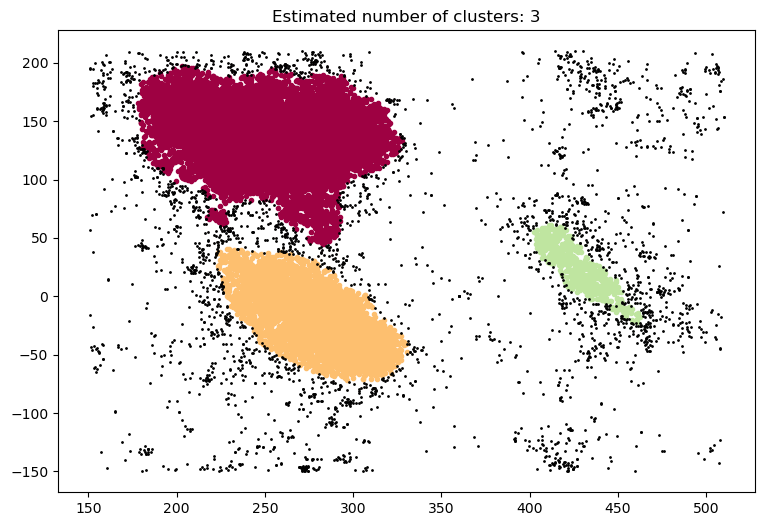

In [96]:
# Plot result
plt.figure(figsize=(9,6))
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_ny[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor=tuple(col), markersize=3)

    xy = X_ny[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## 3. c)

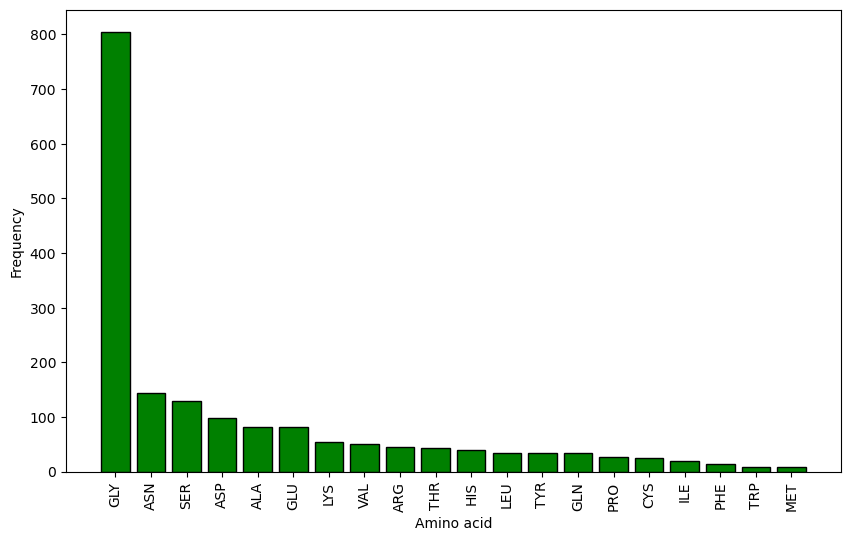

In [97]:
from collections import Counter

df = pd.read_csv('data_assignment3.csv')
n_noise_ = list(labels)

amino_acids = np.array(df['residue name'])
plotlist=[];

for i in range(1,len(n_noise_)):
    if n_noise_[i] == -1:
        plotlist.append(amino_acids[i])

# Count the frequency of each element in plotlist
freq_dict = dict(Counter(plotlist))

# Sort the elements based on their frequency
sorted_elements = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the elements and their frequency for plotting
elements = [elem[0] for elem in sorted_elements]
frequency = [elem[1] for elem in sorted_elements]

plt.figure(figsize=(10,6))        
plt.bar(elements, frequency, color='green', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Amino acid')
plt.ylabel('Frequency')
plt.show()

In total there are 1781 outliers, which are presented in the histogram above. Amino acid GLY have the biggest amount of outliers.

## 3. d)

#### Comparison between K-means and DBSCAN

When using K-means, we include outliers in the clusters, which can make K-means sensitive to outliers and affect the clusters. Additionally, K-means works well for circular datasets, but in this particular dataset, especially the cluster to the right is not very spherical, so K-means is probably not the optimal choice. On the other hand, when using DBSCAN, we obtain a reasonable cluster for the dataset because this method does not include outliers and can create clusters for almost any kind of dataset, regardless of its shape (i.e., it does not need to be spherical).

## Problem 4

## Scatter of psi-phi for amino acid 'PRO'

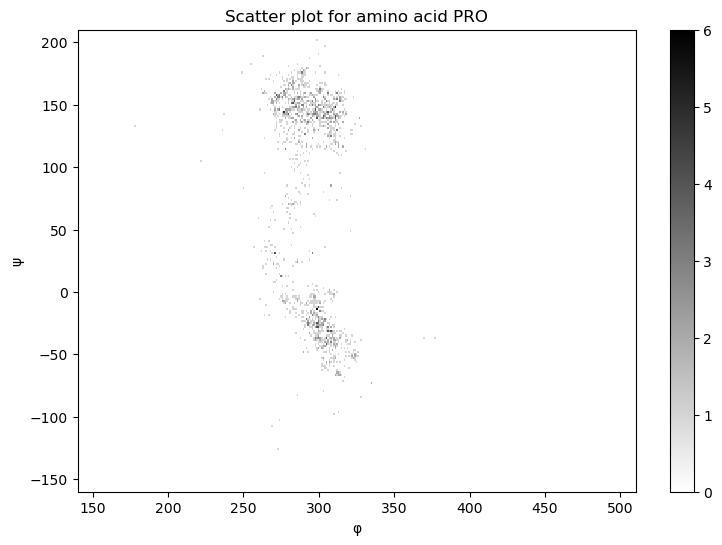

In [98]:
df = pd.read_csv('data_assignment3.csv')

pro = df.loc[(df['residue name'] == 'PRO')]

phi_x_PRO = np.array(pro['phi'])
psi_y_PRO = np.array(pro['psi'])

for i in range(len(phi_x_PRO)):
    if phi_x_PRO[i] < 150:
        phi_x_PRO[i] = phi_x_PRO[i] + 360  
        
for i in range(len(psi_y_PRO)):
    if psi_y_PRO[i] < -150:
        psi_y_PRO[i] = psi_y_PRO[i] + 360

plt.figure(figsize=(9,6))
plt.xlabel('\u03C6')
plt.ylabel('\u03C8')
plt.hist2d(phi_x_PRO, psi_y_PRO, bins=200, cmap='binary')
cb = plt.colorbar()
plt.title('Scatter plot for amino acid PRO')
plt.xlim(140, 510)
plt.ylim(-160, 210)
plt.show()

In [99]:
X_ny_PRO = np.column_stack((phi_x_PRO, psi_y_PRO))
print(X_ny_PRO)

# Compute DBSCAN
db = DBSCAN(eps=25,min_samples=80).fit(X_ny_PRO)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(db)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points (outliers): %d' % n_noise_)

[[315.71679  136.002076]
 [310.055355 -25.888991]
 [283.547986  97.745207]
 ...
 [300.38786  160.048387]
 [311.320165 135.208297]
 [298.378726 -41.69496 ]]
DBSCAN(eps=25, min_samples=80)
Estimated number of clusters: 2
Estimated number of noise points (outliers): 61


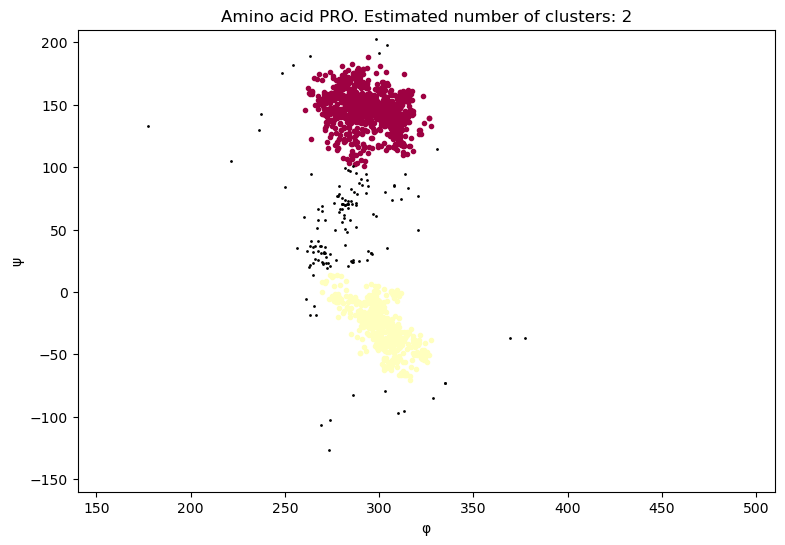

In [100]:
# Plot result
plt.figure(figsize=(9,6))
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_ny_PRO[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor=tuple(col), markersize=3)

    xy = X_ny_PRO[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=1)

plt.title('Amino acid PRO. Estimated number of clusters: %d' % n_clusters_)
plt.xlabel('\u03C6')
plt.ylabel('\u03C8')
plt.xlim(140, 510)
plt.ylim(-160, 210)

plt.show()

We have transoformed the data for amino acid PRO and sat x and y axis limits so we can see where the PRO data were placed in the DBSCAN plot in 3.b).

From the DBSCAN above, we can see that there are mainly two variants of the amino acid PRO. Both have mainly the same φ angle (around 300°) but two different ψ angles (at -40° and 150°). The plot above is better when looking at a specific amino acid (in this case PRO), compared to the DBSCAN plot in 3.b) where we are plotting and using DBSCAN to cluster all the amino acids. In the plot from 3.b) we can not identify different amino acids just by looking at the plot, since the plot in 3.b) is just showing amino acids with similar φ-ψ angles combination.